# Module 7: Feature Representation

## Table of Contents
<br>

<ol>
  <li>What is Feature Representation?</li>
  <li>Bag-of-Words (BOW)</li>
  <li>N-grams</li>
  <li>One Hot Encoding</li>
  <li>Term Frequency–Inverse Document Frequency (TF-IDF)</li>
  <li>Word Embeddings</li>
  <li>Word embeddings using Gensim - word2vec</li>
  <li>Using Word Embeddings</li>
  <li>Principal Component Analysis</li> 
  <li>Kmeans</li> 
</ol>

**Learning Outcomes:** 


* Describe N-grams and how to extract them from a corpus.
* Be able to transform text data into numeric data using Bag-of-Words approach and One-Hot Encoding methods.
* Describe TFIDF scoring method and how to apply it using the sklearn library
* Describe word embeddings and how to extract them from a corpus.


In [ ]:
# standard library
import re
import string

# third party
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import nltk
nltk.data.path.append("../../local_packages/nltk_local")

from gensim.models import KeyedVectors
from gensim.models import Word2Vec

import spacy


## 7.1 What is a Feature Representation

Feature Representation is about applying feature engineering techniques to convert the text data into numeric data. 

Machine learning algorithms cannot work with raw text directly; the text must be converted into numbers. Specifically, vectors of numbers.

"*In language processing, the vectors x are derived from textual data, in order to reflect various linguistic properties of the text*"

— Page 65, Neural Network Methods in Natural Language Processing, 2017.

This is called **feature extraction** or **feature encoding**

**Scikit-learn**

Scikit-learn is an open source machine learning library. Scikit-learn’s `CountVectorizer` and `TfidfVectorizer` objects are used to convert a collection of text documents to a vector of term/token counts or of inverse document frequency weightings.

It also enables the pre-processing of text data prior to generating the vector representation. 


## 7.2 Bag-of-Words (BOW)

A popular and simple method of feature extraction.

BOW does not consider grammar or word order. Suppose we have a sentence, BOW measures the frequency of each word.
<br>



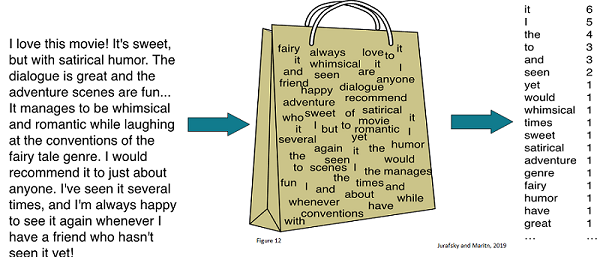

Bag of words is a model that has no associated order

Why is this a useful method to pick?
* simple
* assumes word frequency is important
* assumes word order is not important



The model is simple in that it throws away all of the order information in the words and focuses on the occurrence of words in a document.

`sklearn` object -  **CountVectorizer** is used to convert a collection of text documents to a matrix of token counts.

CountVectorizer creates a term frequency matrix from our documents. For each document it states how many times a specific token appears. The rows represent the different documents and the columns represent the tokens. Most documents do not contain many words compared to the vocabulary of all the documents. For this reason a lot of entries in a term frequency matrix are zeros. When a lot of values in a matrix are zeros we call it "sparse". 

The term frequency matrix produced by CountVectorizer is a type of bag of words model. This is because the resulting representation does not take into account word order in each document.

In [ ]:
# each element in the corpus is a document
corpus = ['This is the first document.', 
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']

# Create instance of vectorizer with default parameters
vectorizer = CountVectorizer()

# Tokenizing and building the vocaculary using the corpus
vectorized_example = vectorizer.fit_transform(corpus)

# Display feature original names
print(vectorizer.get_feature_names_out())

In [ ]:
# This is what the term frequency matrix produced looks like
# Note that this is a count, with values 0, 1 and 2
vectorized_example.toarray()

In [ ]:
# what is the max frequency?
vectorized_example.max()

We often convert our feature representations from `numpy` arrays to `pandas` dataframes for ease of viewing and manipulation. However, if you are going to be doing machine learning it is recommended to become familiar with manipulating `numpy` arrays

In [ ]:
# Convert vectorised data to nicer output
term_document_matrix = pd.DataFrame(vectorized_example.toarray(), 
                                    columns=vectorizer.get_feature_names_out())
term_document_matrix

### 7.3 N-grams

A **N-gram** is a sequence of N words. N-gram extraction is carried out as shown in the figure below:



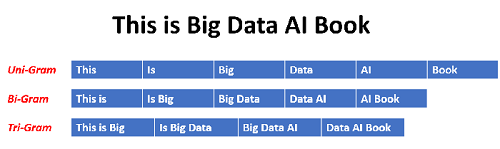




<ul>
  <li>"San Francisco" is a 2-gram.</li>
  <li>"The Three Musketeers" is a 3-gram.</li>
  <li>"She stood up slowly" is a 4-gram.</li>
</ul>

A 2-gram is often referred to as a bigram and a 3-gram as a trigram.


 “*San Francisco*” and “*The Three Musketeers*” are frequently occuring n-grams. Whereas, “*She stood up slowly*” does not occur as frequently in general english langauge usage. 

If we assign a probability to the occurrence of an N-gram or the probability of a word occurring next in a sequence of words, it can be very useful.

1. It can help in deciding which N-grams can be chunked together to form single entities (like “*San Francisco*” chunked together as one token, “high school” being chunked as one token).

2. It can also help make next word predictions. If you have the partial sentence “*Please hand over your*”. Then it is more likely that the next word is going to be “*test*” or “*assignment*” or “*paper*” than the next word being “*school*”.

The probability of an n-gram occuring is found using a corpus of text. The probability is determined by counting the frequency of occurrences of a specific n-gram. 

N-grams can be used to build an **N-gram model**. An, N-gram model predicts the occurrence of a word based on the occurrence of its N – 1 previous words. This is explored further in the next module, [Language Modelling](M8 - Language Modelling.ipynb).

In [ ]:
# You can change this to get n-grams of other lengths. Here n=2 i.e. bigrams.
number_of_tokens_in_ngrams = 2 

example_sentence = 'I am flying to JFK in New York in December to visit the Statue of Liberty and Fifth Avenue'

# using nltk.ngrams
# Splitting the sentence into n-grams. 
n_grams_of_example_sentence = nltk.ngrams(nltk.word_tokenize(example_sentence),
                                          n = number_of_tokens_in_ngrams)

# Produces a list of tuples, each tuple has length=2
list(n_grams_of_example_sentence)

In [ ]:
# A reminder of what our example corpus looks like
corpus

In [ ]:
# split the corpus into bigrams - set ngram_range min and max to 2
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))

# Perform the countvectorisation on the data set
bigram_example = bigram_vectorizer.fit_transform(corpus)

# Note that our resulting feature names have changed order, sorted alphabetically
bigram_vectorizer.get_feature_names_out()

In [ ]:
# Produce a nice looking output table, with the bigrams as column names
term_document_matrix = pd.DataFrame(bigram_example.toarray(), 
                                    columns=bigram_vectorizer.get_feature_names_out())
term_document_matrix

In [ ]:
# We can compare the counts directly to our corpus
term_document_matrix["document"] = corpus

term_document_matrix

<div class="alert alert-info">
  <strong>Note:</strong> In this course we are modelling on the basis of words, a very common way to model text. However, this is not the only way to break down natural language. Instead we could use our normalisation and represenetation techniques using: letters, syllables, sentences or sub-words.
</div>

### 7.4 One Hot Encoding


Typically, any structured dataset includes multiple columns, which can be a combination of numerical as well as categorical variables. Programs can only interpret data mathematically, which makes text harder to work with. Machine learning algorithms cannot accept (with very few exceptions) text / string data as an input.

**Categorical encoding** is a process of converting categories to numbers.

Here we will discuss a widely used technique: **one hot encoding**

<br>

In a corpus (the entire text data) the vocabulary of the whole corpus is described as the set $V$. It contains every unique token in all the documents.

The size of the vocabulary is therefore the size of the set $V$. This is denoted $|V|$. 

In one hot encoding, each word is represented as a vector of length $|V|$.

Each word’s one hot encoded vector is essentially a **binary vector** with the value 1 being in a unique index for each word and the value 0 being in every other index of the vector. Let’s visualize this.

Suppose our data comprises of the following 2 sentences:

"*Deep learning is hard*" <br>
"*Deep learning is fun*" <br>

<br>

The vocabulary is then:
$V$ = **{‘Deep’, ‘learning’, ‘is’, ‘hard’, ‘fun’}.**

<br>
Here, the value of $|V|$ is 5, because there are 5 unique words: <br>




Now to represent each word, we will use a vector of length 5.
<br>


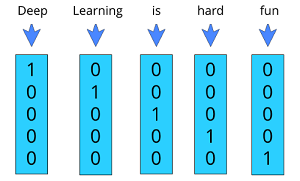
<br>

Firstly, the size of each word’s one hot encoded vector will always be $|V|$, which is the size of the entire vocabulary.

In the example it was 5 but usually the value of $|V|$ can reach 10k or even 100k. 

This means we need a huge vector just to represent a single word, which can lead to excessive memory usage while representing text as vectors.

Secondly, the index which is assigned to each word does not hold any semantic meaning, it is merely an arbitrary value assigned to it. When we consider the vectors for two words, we would ideally want the vectors of similar meaning to have similar vectors.

Ideally, we would want vectors for words that have similar meanings or represent similar items to be close together, and far away from those that have completely different meanings: we want *apple* to be close to *banana* but far away from *king*. 

Also, one hot encodings are very computer memory inefficient. They are **huge empty vectors** with only one item having a value different than zero. They are very sparse, and can greatly slow down our calculations. 

In conclusion: one hot encodings **don’t take into account the context or meaning of the words**, all the words vectors have the same distance in between them, and are highly inefficient. 

Word embeddings (covered shortly) solve these problems by representing each word in the vocabulary by a fairly small (150, 300, 500 dimensional) fixed size vector, called an embedding, which is learned during the training.

**Why Use a One Hot Encoding?**


A one hot encoding allows the representation of categorical data to be more expressive.

Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

One hot encodings tell us whether or not a word is in a document. If certain combinations of words or specific words appear in a document then this can be extremely informative for a model. This can happen even if the order of those words isn't taken into account.

If a sentence uses a lot of happy words, then we can reasonably assume that in many cases the sentence is happy - regardless of the order of the words. This assumption holds in some cases, and not in others. It's our role as data scientists / analysts alongside domain experts to determine if this is a valid in our specific use case.

**Using sklearn** for One Hot Encoding

In [ ]:
text = "deep learning is hard, deep learning is fun"

# Get unique elements for encoding, ensure output is in a list
text = text.split(" ")

# The words have been tokenised in a basic manner
text

In [ ]:
# Convert data into a frame
word_tokens = pd.DataFrame(text, columns=['word'])
word_tokens

In [ ]:
# Creating instance of one-hot-encoder
one_hot_encoder = OneHotEncoder()

In [ ]:
# Generate the one-hot encoding
encoded_array = one_hot_encoder.fit_transform(word_tokens[['word']]).toarray()
encoded_array

In [ ]:
# Passing category - word column to encoder
encoded_df = pd.DataFrame(encoded_array)
encoded_df

In [ ]:
#add back the word_tokens to the associate with the encoded values 
encoded_df = pd.concat([word_tokens['word'], encoded_df], axis=1)
encoded_df

In [ ]:
# Find the original word tokens that were encoded from the encoder
original_words = one_hot_encoder.get_feature_names()
original_words

In [ ]:
encoded_data = pd.DataFrame(encoded_array, columns=original_words)
encoded_data

Note that the above allows us to produce one-hot encodings for text based data. However, each record was one single token and not a document. To produce one-hot encodings for a whole document we can instead use the `CountVectorizer` used previously with adaptations.

Previously the count vectorizer method measures how many of a specific token appear in a text. If instead of the count being `0, 1, 2, 3` the count were binary, `0, 1` then this would tell us whether or not a token appears in a text, rather than how many times. This extension of one-hot encoding can be a useful way to represent features where we think it's more important to know whether or not a text included a token, rather than how many times it appears.

It's definitely worth exploring what other parameters are available to help you harness existing capabilities. In particular you can use your own preprocessing functions, stopwords and tokenizer with [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

In [ ]:
# using the `corpus` object from previous examples
corpus

In [ ]:
# Create instance of vectorizer with binary parameter
binary_vectorizer = CountVectorizer(binary=True)

# Tokenizing and building the vocaculary using the corpus
vectorized_binary_example = binary_vectorizer.fit_transform(corpus)

In [ ]:
# Produce a nice looking output table, with the token as column names
binary_term_document_matrix = pd.DataFrame(vectorized_binary_example.toarray(), 
                                    columns=binary_vectorizer.get_feature_names())
binary_term_document_matrix

In [ ]:
# We can see which documents have corresponding 1's and 0's
binary_term_document_matrix["corpus"] = corpus

# note that some cleaning has occured, 
# "The" does not appear in the terms, it's converted to "the"
binary_term_document_matrix

### 7.5 Term Frequency–Inverse Document Frequency (TF-IDF)

**Tf-idf** weight is a weight often used in information retrieval. 

This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. 

The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the overall corpus.

Words that are common in every document, such as "this", "what", and "if", rank low even though they may appear many times, since they don’t mean much to that document in particular. However, if the word "bug" appears many times in a document, while not appearing many times in others, it probably means that it’s very relevant.

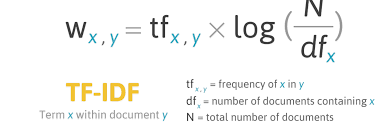


<br>

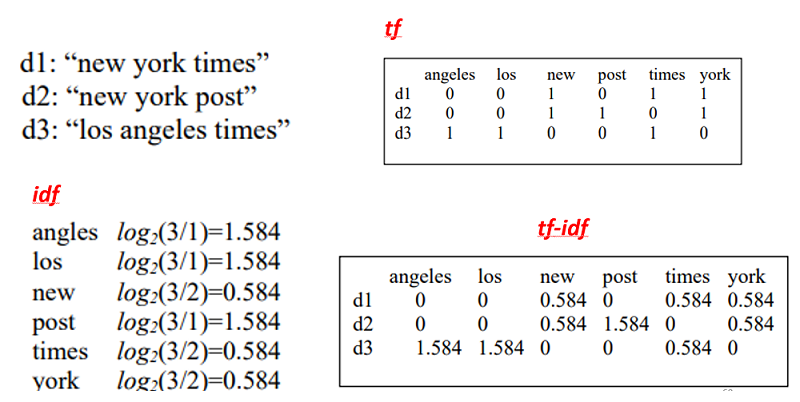







In [ ]:
corpus = ['This is the first document',
          'This document is the second document',
          'And this is the third one',
          'Is this the first document']

In [ ]:
# Create an instance of the tfidf vectorizer
td_idf_vectorizer = TfidfVectorizer()

corpus_vectorised = td_idf_vectorizer.fit_transform(corpus)

# If you want to look at it
tfidf_matrix = pd.DataFrame(corpus_vectorised.toarray(), 
                            columns=td_idf_vectorizer.get_feature_names_out())
tfidf_matrix

In the small data set above it's quite unclear to see the difference between different terms importance, this is because of the small document counts of each word.

**Lets try this on spam/ham data set**

In [ ]:
raw_data = pd.read_csv("../../data/SMSSpamCollection.csv",  encoding="iso-8859-1") 

In [ ]:
#some basic pre-processing to standardise the word tokens
raw_data["Description" ]= raw_data["Description"].str.lower()

In [ ]:
#have a look at it
raw_data["Description"].head()

In [ ]:
#remove numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

In [ ]:
raw_data['Description'] = raw_data['Description'].apply(remove_numbers)

In [ ]:
#put all the descriptions into a list
description_in_a_list = raw_data["Description"].to_list()
#view first 10 entries
description_in_a_list[:10]

In [ ]:
td_idf_vectorizer = TfidfVectorizer()

# Subset of original data set
samp_data_vectorised = td_idf_vectorizer.fit_transform(raw_data['Description'][1:100])

# To view the values
tfidf_matrix_spamham = pd.DataFrame(samp_data_vectorised.toarray(), 
                                    columns=td_idf_vectorizer.get_feature_names())

tfidf_matrix_spamham

In this encoding we now have a representation for each word in each document which describes how important that word is in the context of the whole corpus.

### 7.6 Word Embeddings

**Word embeddings are vector representations of words**, that are typically learnt by an unsupervised model when fed with large amounts of text as input (e.g. Wikipedia, science, new articles etc.). We don't need to understand the specifics of the model that produces them, but we do need to understand the intuition that produces them.

When a word occurs within the vicinity of another word, it doesn’t always mean it has a similar meaning, but when we consider the frequency of words which are found close together, we find that words of similar meaning are often found together.

For example, the word “*Dog*” will be found within the vicinity of the word “*Cat*” a lot more frequently than it will be found within the vicinity of the word “*Computer*”, this is because “*Dog*” shares certain semantic similarity with “*Cat*” and there will hence be many sentences containing both “*Dog*” and “*Cat*”. This is the key factor which deep learning researchers have exploited to come up with embedding word vectors. 

By using the "*surroundings*" of a word, we can compare words numerically.

These representation of words capture semantic similarity between words among other properties (see figure below). They are hence very useful to represent words in downstream NLP tasks such as POS tagging, NER and more.

<br>

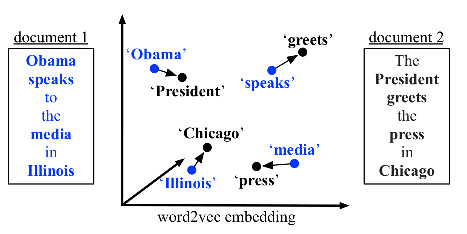


<br>


We will examine three families of word embeddings below:

Neural Networks are well beyond the scope of this course, therefore just the intuition behind the models are given.

**Bag of words based** The original, word order independent models like Word2Vec and Glove. Each word is given a coordinate in a high dimension space. <br>

**Attention (Transformer) based** Embeddings generated by a neural nextwork architecture using transformers, such as BERT (Bidirectional Encoder Representations from Transformers), which has produced state-of-art results to date in downstream tasks like NER, Q&A, classification etc. BERT takes into account order of words in a sentence but is based on attention mechanism. An attention mechanism allows the network to look at different parts of a sequence of words rather than a fixed amount. <br>

**RNN (reccurent neural network) family based** Sequence models, such as ELMo (Embeddings from Language Models), that produce word embeddings. These types of embeddings use fixed length sequences of words to learn their embeddings. ELMo learns from a language model, a concept we will discuss in the next chapter.<br>


You may be asking, why are so many neural network based NLP techniques named after puppet characters? [This is adressed in this article.](https://www.theverge.com/2019/12/11/20993407/ai-language-models-muppets-sesame-street-muppetware-elmo-bert-ernie)

<br>



The main difference between the word embeddings of **Word2Vec, Glove, ELMo and BERT** is that Word2Vec and Glove are context independent whereas ELMo and BERT can generate different word embeddings for a word that capture the context of the word.

This means that homonyms (words with identical spellings but different meanings) are considered the same by Word2Vec and Glove but different by ELMo and BERT. For example, let's consider the sentence *“He went to the prison cell with his cell phone to extract blood cell samples from inmates”*. Here Word2Vec and Glove would collapse all the meanings for the word *"cell"* into one vector in the output. However, both ELMo and BERT would generate different vectors for each meaning of the word *"cell"*. The first cell (prison cell case), for instance, would be closer to words like incarceration and crime. Whereas the second *“cell”* (phone case) would be closer to words like iphone, android and galaxy.
<br>

This difference is a consequence of the fact that Word2Vec and Glove do not take into account word order in their training.
<br>

A practical implication of squashing all meanings into a single vector is that we can use word2vec and Glove vectors trained on a large corpus directly for downstream tasks without the need for the model itself that was used to train the vectors. All we need is the vectors for the words.
<br>

However, in the case of ELMo and BERT, since they are context dependent, we need the model that was used to train the vectors even after training, since the models generate the vectors for a word based on context. 

We can just use the context independent vectors for a word if we choose too (i.e. just feed in a word standalone to the model and get its vector), but this would defeat the very advantage of these models. The figure below captures this latest trend of using word embeddings along with the models they were trained on for downstream tasks



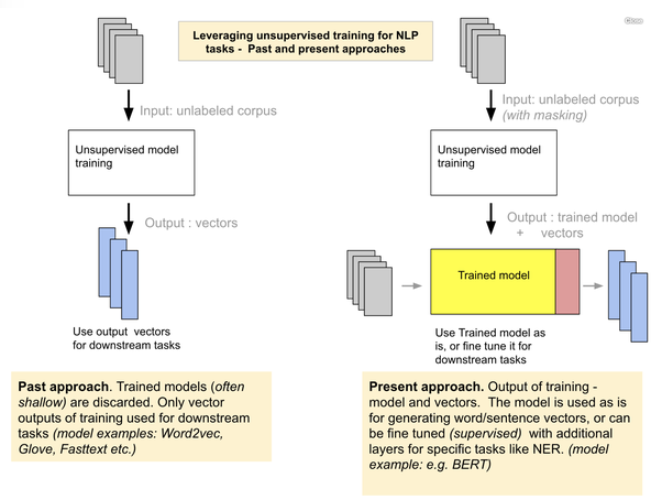

### 7.7 Word embeddings - Word2Vec

Word2Vec is a statistical method for efficiently learning a standalone word embedding from a text corpus.
<br>

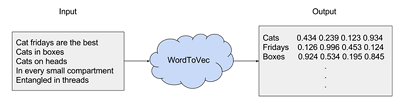
<br>

It was developed by Tomas Mikolov, et al. at Google in 2013 in an effort to make neural-network-based training of embeddings more efficient and since then has become the de facto standard for developing pre-trained word embedding.

Word2Vec uses neural networks with single hidden layers trained to perform a certain task. However we then don't actually use the neural networks for the task they are trained on. Instead, the goal is to learn the weights of the hidden layer. We’ll see that these weights are actually the “word vectors” that we’re trying to learn.

In practice we can either:

* Create our own embedding using the Word2Vec method
* Use a pretrained embedding from a organisation, typically Google, that was made using Word2Vec on a large data set

In this sense, Word2Vec can refer to either the pre-trained embeddings [from google](https://code.google.com/archive/p/word2vec/) or the approach to producing word embeddings called Word2Vec.

There are many algorithms that can learn word embeddings, the general goal is to build a matrix $E$, that can translate a one-hot vector representing a word, to a fixed sized vector that is the embedding of such word.


Google’s Word2Vec is one of the most widely used implementations of word embeddings due to its training speed and performance. 
<br>

Word2Vec is a predictive model, which means that instead of utilizing word counts, it is trained to predict a target word from the context of its neighbouring words. 
<br>

The model first encodes each word using one-hot-encoding, then feeds it into a hidden layer using a matrix of weights; the output of this process is the target word. The word embedding vectors are actually the weights of this fitted model. 

Word2vec includes two “flavors” of word embedding model: **continuous bag of words (CBOW)** and **skip gram**. 
<br>

Continuous Bag of Words (CBOW) inputs *‘I’, ‘like’, ’wings’* and teaches the model to predict *‘chicken’* i.e., predicting the word given its context. 
<br>

Skip Gram inputs *‘chicken’* and teaches the network to predict *‘I’, ‘like’, ’wings’* i.e., predicting the context given a word.



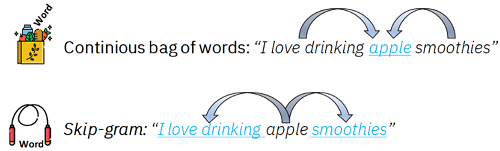



The distributed representation is learned based on the usage of words. This allows words that are used in similar ways to result in having similar representations, naturally capturing their meaning.

This notion of letting the usage of the word define its meaning can be summarized by an oft repeated quip by John Firth (1957):

**"*You shall know a word by the company it keeps!*"**


### 7.8 Using Word Embeddings

You have some options when it comes to using word embeddings in your natural language processing project.

**1. Learn an Embedding**

You may choose to learn a word embedding for your problem.

This will require a large amount of text data to ensure that useful embeddings are learned, such as millions or billions of words.

You have two main options when training your word embedding:

Learn it *Standalone*, where a model is trained to learn the embedding, which is saved and used as a part of another model for your task later. This is a good approach if you would like to use the same embedding in multiple models.

Learn *Jointly*, where the embedding is learned as part of a large task-specific model. This is a good approach if you only intend to use the embedding on one task.

**2. Reuse an Embedding**

It is common for researchers to make pre-trained word embeddings available for free, often under a permissive license so that you can use them on your own academic or commercial projects.

For example, both Word2Vec and GloVe word embeddings are available for free download.

These can be used on your project instead of training your own embeddings from scratch.

You have two main options when it comes to using pre-trained embeddings:

**Static**, where the embedding is kept static and is used as a component of your model. This is a suitable approach if the embedding is a good fit for your problem and gives good results.

**Updated**, where the pre-trained embedding is used to seed the model, but the embedding is updated jointly during the training of the model. This may be a good option if you are looking to get the most out of the model and embedding on your task.

When we reuse an already existing representation or model on a different problem than what the model was originally trained on, this can produce good results. This process is called <strong>transfer learning</strong>.

Along with the paper and code for Word2Vec, Google also published a pre-trained Word2Vec model on the Word2Vec Google Code Project.
<br>

A pre-trained model is nothing more than a file containing tokens and their associated word vectors. The pre-trained Google word2vec model was trained on Google news data (about 100 billion words); it contains 3 million words and phrases and was fit using 300-dimensional word vectors.
<br>

[Gensim](https://radimrehurek.com/gensim/auto_examples/index.html) is a useful package for creating wording embeddings and working with Word2Vec.


### Pre-trained models in Spacy

Using pre-trained models in Spacy is incredibly convenient, given that they come built-in.

When we use a spacy model we can use all of it's pre-trained feautres for NLP tasks. For example, the model will provide embeddings for all the words we give it.

Load the core English model using:

In [ ]:
# spaCy has a number of different models of different sizes available for use, the one below is the
# small english model
# Load the language model instance in spaCy locally
nlp = spacy.load('../../local_packages/spacy_local/small_practice_model/en_core_web_sm-2.3.1')

# If you want to install your own model you can do so below
#nlp = spacy.load('model_name')

In [ ]:
# process a sentence using the model
doc = nlp("This is some text that I am processing with Spacy")
# It's that simple - all of the vectors and words are assigned after this point

# looking at the word "text"
doc[3]

In [ ]:
# We can access the vector embedding for "text"
doc[3].vector

When we have vector representations we can compare different vectors using a measurement of similarity.

When vectors refer to similar concepts, their vectors have similar properties. 

A common property to compare vectors by is the direction they point.

To do this we often use the "cosine similarity" measurement. Cosine similarity values of near 1 represent similar vector directions. Vectors with similarity score near 0 have low similarity. 

We would expect vectors representing "King" and "Queen" to have high similarity scores. Whereas the vectors for "table" and "congestion" would have low similarity.

If we are looking at the similarity between two vectors, how those vectors were made is important to our understanding of their similarity.

In [ ]:
# Similarity of "text" and "processing"
doc[3].similarity(doc[7])

In [ ]:
# How big is the document
len(doc)

#### Prinicipal Component Analysis

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is used to reduce the dimensionality of large data sets by transforming a large set of variables into a smaller set that still contains most of the information in the large set. It is used throughout the sections below to support our understand of the data.

Using this technique we will be able to visualise our high dimension representations of word vectors in 2D space. It's use is not crucial to our understanding of NLP techniques, but is a common machine learning methods for reducing the number of dimensions in the data to help use understand our data.


We are going to explore what the embedding vectors look like visually. To do this we need to reduce the dimensionality of each vector, while preserving as much information as possible. To do this we use a technique called Principal Component Analysis. This technique is covered in more detail in the Machine Learning Theory and Machine Learning in Python courses.

In order to perform PCA we first need to reformat the vectors to be an array of vectors.

In [ ]:
# reshape for PCA

def reshape_vectors(pdoc):
    # Find size of embedding
    vector_len = len(pdoc[0].vector)
    
    # Convert each word to a vector and concatenate vectors
    arr = np.concatenate([word.vector.reshape(1, vector_len) for word in pdoc])
    
    return arr  

In [ ]:
# The initial dimension of the first single vector
print(doc[0].vector.shape)

In [ ]:
reshapped = reshape_vectors(doc)
print("Reshaped dimensions:", reshapped.shape)
print(reshapped)


In [ ]:
#now for PCA

In [ ]:
#reduce dimensionality of the data to 2 dimensions - so can be plotted and visualised
pca1 = PCA(n_components=2)
result = pca1.fit_transform(reshapped)

In [ ]:
# This representation should contain as much information
# from the original embedding as possible, but in 2 dimensions
result

In [ ]:

plt.clf()

# Convert our array to two columns
xs = result[:, 0]
ys = result[:, 1]

# plot the points
plt.scatter(xs,ys)

num = 0
# Add the labels to all the data points
#zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    plt.annotate(str(doc[num]), # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
    num = num + 1


plt.show()

Words that appear close to eachother are thought to have similar meaning.

**Pre-trained models in Gensim**

The Gensim package doesn’t come with the same built-in models as spaCy, so to load a pre-trained model into Gensim, you first need to find and download one.

A popular pre-trained option is the Google News dataset model, containing 300-dimensional embeddings for 3 millions words and phrases. 

The type of data we use to train a model will impact how good it is for our use case. Will the formal language of news headlines transfer well to social media slang? Potentially.

Loading and accessing vectors is then straightforward. 

The vectors can be downloaded fron here:

https://github.com/mmihaltz/word2vec-GoogleNews-vectors


**Create Custom Word Embeddings**

The Gensim library provides a simple API to the Google word2vec algorithm which is a go-to algorithm for beginners.

To train your own model, the main challenge is getting access to a training data set. 




In [ ]:
# Reload clean data
raw_data = pd.read_csv("../../data/SMSSpamCollection.csv",  encoding="iso-8859-1") 

# basic tokenisation
raw_data["Description"] = raw_data["Description"].str.split()

In [ ]:
raw_data["Description"].head()

In [ ]:
# convert the data into a model appropriate data structure
description_list = raw_data["Description"].to_list()

For more information on how to use the Word2vec implimentation using `gensim` see [the documentation](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec). 

Feel free to play around with the parameters for the model to see how the resulting visualisation changes after training.



In [ ]:
# We set the parameters of the model
model = Word2Vec(description_list, 
                 min_count=20, # ignores words with count lower than `min_count`
                 size=50, # The number of dimensions of the resulting embedding
                 workers=4) # How many threads to uses in your computer to run the learning

# Summarize the loaded model
print(model)

The model summary tells us:

* `vocab` - The vocabulary used in the model (remember some words have been removed due to low count)
* `size` - How many dimensions the embeddings are learned in. This parameter may change to `vector_size` in later package versons
* `alpha` - the initial learning rate of the neural network optimizer. This can help us tune the model to get out better results.

In [ ]:
# Summarize vocabulary
words = list(model.wv.vocab)
print(words)

In [ ]:
print(model['win']) # the learned embedding for the word "win"

In [ ]:
# collapse for PCA
word_vectors_array = model[model.wv.vocab]

In [ ]:
type(word_vectors_array)

In [ ]:
word_vectors_array.shape

In [ ]:
# reduce dimensionality of the data to 2 dimensions - so can be plotted and visualised
pca_word2vec = PCA(n_components=2)
result_word2vec = pca_word2vec.fit_transform(word_vectors_array)

In [ ]:
result_word2vec.shape

In [ ]:
# Create plot

# set up the size of the layout of the plot - 8 points on the x axix by 8 on the y axis. Only one plot to be printed.
fig, ax = plt.subplots(figsize=(8,8), nrows=1, ncols=1)

# set the points to plot in the x axis (all values in the first column of array results 
# set the points to plot in the y axis (all values in the second column of array results 
# points will be red 

ax.scatter(result_word2vec[:, 0], result_word2vec[:, 1], c="red", s=5, label="spamham")

#set the limits of values to plot and that can be visualised for the x and y axis.
xmin, xmax = -0.50, 1.25
ymin, ymax = -0.04, 0.04
ax.set_xlim(xmin, xmax) 
ax.set_ylim(ymin, ymax)


# get all the words in the model
words = list(model.wv.vocab)

# now for every word vector, ensure that the vector to plot is within the limits set up for xmax and ymax
for i, word in enumerate(words):
    if xmin < result_word2vec[i, 0] < xmax and ymin < result_word2vec[i, 1] < ymax:
        ax.annotate(word, xy=(result_word2vec[i, 0], result_word2vec[i, 1]))



#add a title to plot and put in legend        
ax.set_title('Spam Ham Embeddings')
ax.legend(loc=2);


So what does this plot tell us?

The word embeddings have been trained using the text we gave it.

The embeddings learned were from Word2Vec which represent words that appear in a similar context in a similar position in a high dimensional space (in our case 50 dimensions). The word vectors each represent a word in this new space.

We can't easily visualise all the word vectors as there would need to be 50 axis. For this reason we reduce the number of dimensions while trying to maintain as much structure in the data as possible - using PCA. 

By reducing the data to two dimensions we can get a quick summary of how our embeddings are representing the words.

In theory, words that are similar should appear near one another on this plot.

In practice this may be difficult to see. There are a few reasons for this:

* Small sample size. Good word embeddings are trained on millions if not billions of words. Our data is comparitively small and therefore the network may not be able to learn the appropriate relationships.
* Information loss. As we reduced the dimensionality from 50 to 2, significant loss of information may occur, meaning our 2D distances are not accurate.

### 7.10 K-Means clustering

Clustering is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data. 
It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different. 

We are going to use it in this course not to create feature representations of our text, but to explore those representations.
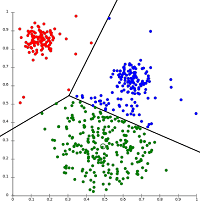



For more information on how clustering works and how to use it see the Machine Learning Theory and Machine Learning in Python courses.

In other words, we try to find homogeneous subgroups within the data such that data points in each cluster are as similar as possible according to a similarity measure such as euclidean-based distance or correlation-based distance. 

K-Means is an algorithm which clusters the data into K clusters.

K-Means is widely used for many applications (Image Segmentation, News Article Clustering, Clustering Languages).

The clustering of data allows us to group together similar data, in our case documents or words. Once the data is grouped we have a better understanding of the structure of the data we are working with.

This clustering will be done on tfidf scores calculated by the TfidfVectorizer. However we could cluster based on term frequency, or any other encoding we have looked at. Each encoding will give us a different representation, and therefore the clustering results will be different.

Clustering by tf-idf (word importance) will give us groupings of which documents have similar words of importance. 

Documents that are focused on a certain topic, will have some set of words which are important to that topic. Documents that use those same set of words will be clustered together.

In [ ]:
raw_data = pd.read_csv("../../data/SMSSpamCollection.csv",  encoding="iso-8859-1") 

spam_description_documents = raw_data["Description"].to_list()

In [ ]:
# Cluster on tfidf scores

# Create vectorizer object
vectorizer = TfidfVectorizer()

# Vectorise the Description data, set up matrix
vectorized_example = vectorizer.fit_transform(spam_description_documents)

# Put tfidf data into dataframe to view
term_document_matrix = pd.DataFrame(vectorized_example.toarray(), 
                                    columns=vectorizer.get_feature_names())

term_document_matrix

In [ ]:
# Initialise kmeans algorithm
# The number of clusters to form as well as the number of centroids to generate.
km = KMeans(n_clusters=2)

# fit = Compute k-means clustering on tfidf scores read from tdm
clusters = km.fit(term_document_matrix)

#Show counts per cluster number
print("Counts per Cluster", np.unique(clusters.labels_, return_counts=True))


In [ ]:
print("Number of documents clustered", np.unique(clusters.labels_, return_counts=True)[1].sum())

In [ ]:
# K-means clustering uses an iterative algorithm to solve
# The clustering, we can see how many iterations it took to
# get there

# Show number of iterations of K-means
print("number of iterations: {0}".format(clusters.n_iter_))

In [ ]:
raw_data['clusterresult'] = clusters.labels_
print(raw_data)

In [ ]:
# number of rows where 'clusterresult == 0 - how many descriptions put into 0 cluster
(raw_data['clusterresult'] == 0).sum()

In [ ]:
# number of rows where 'clusterresult ==1 - how many descriptions put into 1 cluster
(raw_data['clusterresult'] == 1).sum()

We haven't explicitly tried to predict whether an email is spam or ham, that would require supervised learning. However, we can explore whether our `k=2` clustering was able to group the different classes separately.

We can plot our resulting groups and compare them with the spam / ham classification.

In [ ]:
# reduce the dimensionality of the data in order to visualise it
pca = PCA(n_components=2)
tfidf_reduced_dim = pca.fit_transform(term_document_matrix)


In [ ]:
# Plot found cluster labels of K-means clustering
plt.scatter(x=tfidf_reduced_dim[:,0], 
            y=tfidf_reduced_dim[:,1], 
            c=clusters.labels_, 
            alpha=0.2)
plt.title("Plot of TF-IDF scores with K-mean clusters found shown");

In [ ]:
# Plot the spam/ham classifications
plt.scatter(x=tfidf_reduced_dim[:,0], 
            y=tfidf_reduced_dim[:,1], 
            alpha=0.2, 
            cmap="prism", # spam = green, ham = red
            c=raw_data["Email"].map({"spam": 1, "ham": 0}).to_list())
plt.title("Plot of TF-IDF scores with spam/ham shown");

So what does the above clustering and visualisation tell us?

Positives:

* The tf-idf, shown in the second figue does position the spam data near the rest of the spam data
* The use of PCA producing two dimensions does keep the spam data mostly together

Negatives:

* The spam and ham data both exist in the same space and are not separate in this represenation
* The clustering clearly doesn't show us the distinction between spam and ham. 

Further analysis:

* We could explore what the clusterings found mean. They proabably don't show use spam/ham - however they could be making the distinction between position and negative words? Or they could be showing work / non-work text distinctions. To investigate this further we could read groups of the clusters to see if there is a common theme

* Choose a different clustering method, or a different number of clusters. 

* Choose a different word representation method, we may find more interesting groupings using wordcount vectors, or embeddings.

* Visualise different dimensions. We have used a PCA giving us the most informative two dimensions, we could explore other dimensions to see if there is a clearer distinction between clusters / classes in these dimensions.

##### Exercises

Import the patent dataset and perform the steps below to the "Abstract" column <br>
(rename the rows from all zeros to 1,2,3...)
<ol>
    
  <li>Use sklearn object <b>CountVectorizer</b> to produce a term document matrix of token counts.</li>
    
        - lowercase text, remove numbers, tokens less than or equal to 2 characters in length and stopwords.
        - Using the matrix, find the words that appear more than 20 times.
        - Find the documents that contain the word "light" 3 or more times.
    
  <li>Set up a term document matrix with bigram counts.</li>
    
        - What is the most frequent bigram in the corpus?

  <li>Use sklearn object <b>TfidfVectorizer()</b> to produce a term document matrix of tfidf scores.</li>
    
        - Plot the tf-idf distribution of the words in the first (zeroth index) document. Exclude words with tfidf == 0. Sort the values. What does this tell us about this document?
    
  <li>Use the Spacy English model to produce embeddings.</li>
       
    - Process the first document in the data frame using the model to create an embedding.
    - Get a similarity score for two embeddings produced for the words: "bond" and "solvent".
    - Compare the previous score with: "bond" and "double" what does this tell us?
    - What two words have the highest similarity scores? (excluding comparing the same word with itself)
    
  <li>Dimension reductions, clusterings and embeddings</li>
    
    - Using the first document in the data set:
    - Convert the embeddings to an array with: a row for each token, a column for each dimension
    - Use PCA to reduce the dimensions to two
    - Plot the tokens from the text in 2D
    - Compare the results of this plot with the results found from the similarity. Do these two methods agree?
    
    
  <li>Use the k-means clustering algorithm in scikit-learn to produce 5 clusters using the tf-idf document matrix.</li>
    
    - Use the resulting label from the cluster to assign each record in the dataframe a cluster
    - How many documents are in each clustering?
    - Read through a few descriptions with the same label - do they have a similar topic?
        - Why could they have a similar topic? What do you think the challenges in getting this approach to work are?

  
   
</ol>

#### References


https://blog.xrds.acm.org/2017/10/introduction-n-grams-need/

https://machinelearningmastery.com/gentle-introduction-bag-words-model/